# Reserve Stories 
Scratch work...not book production yet!

docs_frozen has four templates (reserve_details is empty):

1. specifications that is included in runoff and story 
2. runoff: tells story for know G, know claim count, know reserves, know claims
3. two_step: is like runoff but in two steps: know G then know claims
4. story: is more detailed but takes X0 and Xm1 as reserves

## From Scratch July 2022

With the new Portfolio object etc., that includes some of the enhanced metrics.

Same idea for model: year 1 G is known, year 2 full losses known.

## Provenance

* July 2022: Hack off old CH12_Reserves2 which didn't seem to use the new TensePortfolio construction. 

Focus on populating the reserve story templates. Deleted a lot of graphics stuff from the end. 

In [1]:
import reserve_scripts as rs
from aggregate import build

C:\Users\steve\Documents\SynologyDrive\TELOS\Python\aggregate_project\aggregate\templates True
time: 537 ms


Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


In [2]:
# key control variables 
cv_mix = 0.35  # freq a
min_mix = 0.60  # freq b
reg_p = 0.995 # determines a 
bs = 1/2
log2 = 16
padding = 1
coc = 0.1
# to start with:
dist_name = 'wang'

time: 1.98 ms


In [3]:
prog_two_step = f'''port BASE
    agg X0  5000  loss 1000 x 0 sev lognorm 100 cv 1.25 mixed sig {cv_mix} {min_mix}
    agg Xm1 5000  loss 1000 x 0 sev lognorm 100 cv 1.25 poisson
'''    
print(prog_two_step)

port BASE
    agg X0  5000  loss 1000 x 0 sev lognorm 100 cv 1.25 mixed sig 0.35 0.6
    agg Xm1 5000  loss 1000 x 0 sev lognorm 100 cv 1.25 poisson

time: 988 µs


In [35]:
prog = f'''port BASE
    agg X0  5000  loss 1000 x 0 sev lognorm 100 cv 1.25 mixed sig {cv_mix} {min_mix}
    agg Xm1 5000  loss 1000 x 0 sev lognorm 100 cv 1.25 mixed sig {cv_mix / 2} {min_mix}
    agg Xm2 5000  loss 1000 x 0 sev lognorm 100 cv 0.75 poisson
    agg Xm3 5000  loss 1000 x 0 sev lognorm 100 cv 0.25 poisson'''

prog = f'''port INSCO
    agg Xm1 9000 loss 10 x 0 sev lognorm 3 cv 0.5 mixed gamma 0.06
    agg X0 3000 loss 10 x 0 sev lognorm 2 cv 2 mixed sig 0.35 0.5
'''
coc = 0.075
reg_p = 0.99817
print(prog)

port INSCO
    agg Xm1 9000 loss 10 x 0 sev lognorm 3 cv 0.5 mixed gamma 0.06
    agg X0 3000 loss 10 x 0 sev lognorm 2 cv 2 mixed sig 0.35 0.5

time: 2 ms


In [66]:
log2, bs

(16, 0.5)

time: 2.5 ms


In [68]:
port = build(prog, log2=log2+2, bs=bs/2, padding=padding)
# port = build(prog_two_step, log2=log2, bs=bs, padding=padding)
port.program = prog #  build['BASE'][-1]
port

,X0,Xm1,total
"(freq, mean)",1.705k,3.004k,4.710k
"(sev, mean)",1.759,2.996,2.548
"(agg, mean)",3.000k,9.000k,12.000k
"(freq, cv)",350.837m,62.712m,133.178m
"(sev, cv)",1.273,492.195m,740.066m
"(agg, cv)",352.189m,63.352m,100.049m
"(freq, skew)",2.090,120.117m,1.817
"(sev, skew)",2.237,1.395,1.401
"(agg, skew)",2.074,120.330m,1.427
Mean,3.000k,9.000k,12.000k


time: 1.9 s


In [57]:
port.best_bucket(16)

0.5

time: 6.18 ms


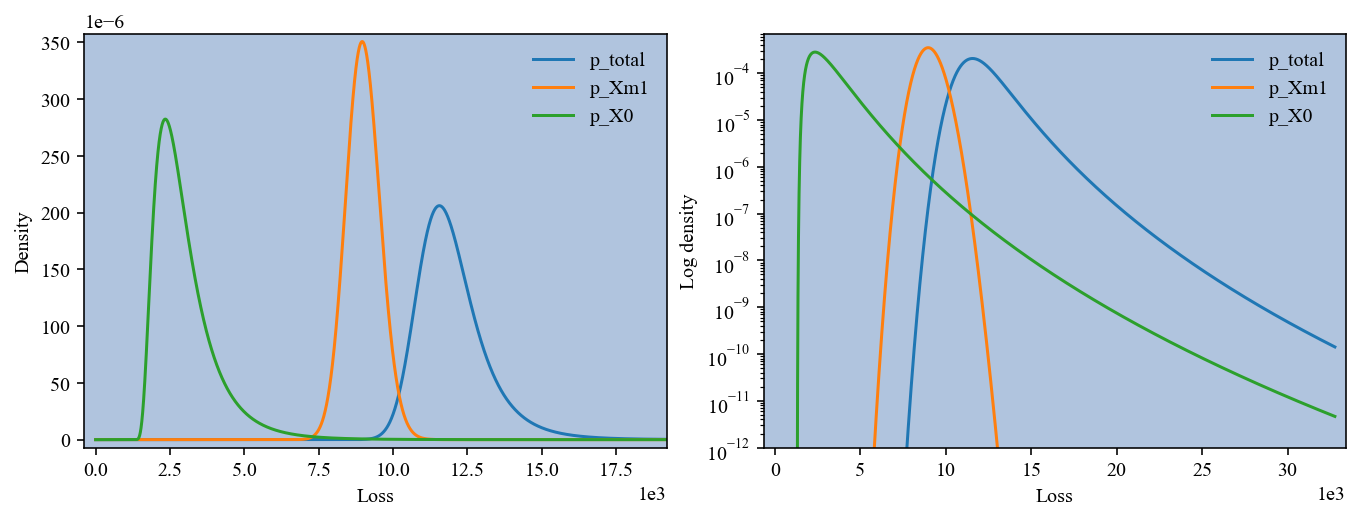

time: 886 ms


In [31]:
port.plot()

In [69]:
port.cdf(18000)

array(   0.99817)

time: 9.1 ms


In [73]:
reg_p = 0.99816675
a = port.q(reg_p)
reg_p, a

(0.99816675, 18000.0)

time: 2.92 ms


In [74]:
port.calibrate_distortions(ROEs=[coc], Ps=[reg_p], strict=False, df=[0, 0.75])

$S$  $\iota$  $\delta$     $\nu$     $EL$  \
$a$     LR       method                                                  
18.000k 966.270m ph       1.833m  75.000m   69.767m  930.233m  11.997k   
                 wang     1.833m  75.000m   69.767m  930.233m  11.997k   
                 cll      1.833m  75.000m   69.767m  930.233m  11.997k   
                 lep      1.833m  75.000m   69.767m  930.233m  11.997k   
                 ly       1.833m  75.000m   69.767m  930.233m  11.997k   
                 clin     1.833m  75.000m   69.767m  930.233m  11.997k   
                 dual     1.833m  75.000m   69.767m  930.233m  11.997k   
                 ccoc     1.833m  75.000m   69.767m  930.233m  11.997k   
                 tvar     1.833m  75.000m   69.767m  930.233m  11.997k   
                 wtdtvar  1.833m  75.000m   69.767m  930.233m  11.997k   

                              $P$   Levg     $K$      ROE     param     error  
$a$     LR       method                                                        
18.000k 966.270m ph       12.416k  2.224  5.584k  75.000m  726.369m  841.210n  
                 wang     12.416k  2.224  5.584k  75.000m  344.080m     0.000  
                 cll      12.416k  2.224  5.584k  75.000m  761.907m   28.876n  
                 lep      12.416k  2.224  5.584k  75.000m  186.593m -216.834n  
                 ly       12.416k  2.224  5.584k  75.000m  482.389m   -9.728n  
                 clin     12.416k  2.224  5.584k  75.000m     1.128     0.000  
                 dual     12.416k  2.224  5.584k  75.000m     1.579  -10.914p  
                 ccoc     12.416k  2.224  5.584k  75.000m   75.000m -862.703n  
                 tvar     12.416k  2.224  5.584k  75.000m  247.890m    9.053u  
                 wtdtvar  12.416k  2.224  5.584k  75.000m  264.434m   -1.819p

time: 156 ms


In [75]:
ans = port.apply_distortion('wang')

time: 829 ms


In [81]:
rs.reserve_story_md(port, 'Xm1', p=reg_p, ROE=coc)
# Path('c:\\temp\\reserves\\rs.md').write_text(port.md, encoding='utf-8')
Path('c:\\temp\\reserves\\rs.html').write_text(port.md, encoding='utf-8')

C:\Users\steve\Documents\SynologyDrive\TELOS\Python\aggregate_project\aggregate\templates True
-99 8998.822721919203 8,998.82 9001.0 5583.879533433965 9531.75


72306

time: 205 ms


In [46]:
port.premium_capital(a=10743.5)

time: 7.91 ms


In [48]:
port.EX_premium_capital

,$X_{0}$,$X_{-1}$,Total
Item,,,
1. Allocated assets,2.845k,7.899k,10.744k
2. Market value liability,2.806k,7.919k,10.726k
3. Expected incurred loss,2.630k,8.076k,10.706k
4. Margin,176.975,-157.061,19.914
5. Loss ratio,936.941m,1.020,998.143m
6. Allocated equity,38.274,-20.641,17.632
7. Cost of allocated equity,4.624,7.609,1.129
8. Premium to surplus ratio,73.325,-383.674,608.316


time: 9 ms


In [83]:
port['Xm1'].q(reg_p)

10743.5

time: 3.01 ms


In [77]:
rs.multi_premium_capital(port, [10743.5, 18000])

port.EX_multi_premium_capital.style.format(lambda x: f'{x:,.4f}')

time: 43.1 ms


In [44]:
port.EX_premium_capital

,$X_{0}$,$X_{-1}$,Total
Item,,,
1. Allocated assets,5.763k,12.237k,18.000k
2. Market value liability,3.322k,9.094k,12.416k
3. Expected incurred loss,2.998k,8.999k,11.997k
4. Margin,323.503,95.454,418.957
5. Loss ratio,902.618m,989.504m,966.257m
6. Allocated equity,2.441k,3.143k,5.584k
7. Cost of allocated equity,132.510m,30.374m,75.032m
8. Premium to surplus ratio,1.361,2.894,2.224


time: 8.71 ms


In [12]:
port.show_enhanced_exhibits()

,Statutory,Objective,Market,Difference
Item,,,,
Assets,29748,29748,29748,0
$X_{0}$,5000,4972,5472.7,500.76
$X_{-1}$,5000,4990.7,5221,230.23
$X_{-2}$,5000,4991.8,5086.3,94.469
$X_{-3}$,5000,4992,5057.6,65.634
Total,20000,19947,20838,891.09
Equity,9748.5,9802,8910.9,-891.09


,Period ending,Beginning risk margin,Margin earned
Resolution during period,,,
In prd 1,1,891.1,500.76
In prd 2,2,390.33,230.23
In prd 3,3,160.1,94.469
In prd 4,4,65.634,65.634
Total,All,1507.2,891.1


,$X_{0}$,$X_{-1}$,$X_{-2}$,$X_{-3}$,Total
Item,,,,,
1. Allocated assets,9229,7345.2,6898.4,6816.4,29748
2. Market value liability,5472.7,5221,5086.3,5057.6,20838
3. Expected incurred loss,4972,4990.7,4991.8,4992,19947
4. Margin,500.76,230.23,94.469,65.634,891.09
5. Loss ratio,0.9085,0.9559,0.98143,0.98702,0.95724
6. Allocated equity,3756.3,2124.2,1812.1,1758.8,8910.9
7. Cost of allocated equity,0.13331,0.10838,0.052133,0.037318,0.1
8. Premium to surplus ratio,1.4569,2.4579,2.8069,2.8757,2.3385


,Break Even,Est. EoY,BoY
Item and View,,,
$S_{Total}(a)$,1,0.052021,0.0049998
$S_{X_{-1}}(a)$,0.12549,6.6678e-11,0
$E[X_{-1}\wedge a]$,4879.1,5000,5000
$\rho(X_{-1}\wedge a)$,5221.1,5441.7,5441.7
$E[X_{-1}(a)]$,1643.9,4970.3,4990.7
$\rho(X_{-1}\subseteq X^c\wedge a)$,1652.1,5178.1,5221
$E[Total(a)]$,6583.8,19856,19947
$\rho(Total\subseteq X^c\wedge a)$,6593,20643,20838
$\Delta a_{ro}$,2972,-15192,-20184


time: 32.7 ms
